<a href="https://colab.research.google.com/github/Gin-Arata/PCVK_13_Gaco-Razan-Kamil/blob/main/Week7_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# @title Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# @title Import Library

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [7]:
# @title Function Konvolusi

def convolution2d(image, kernel, stride, padding):
  # Menambahkan padding pada citra
  if padding > 0:
    image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)

  # Inisialisasi ukuran img dan kernel
  img_height, img_width = image.shape
  kernel_height, kernel_width = kernel.shape

  # Melakukan perhitungan ukuran citra output
  output_height = (img_height - kernel_height) // stride + 1
  output_width = (img_width - kernel_width) // stride + 1

  # Melakukan inisialisasi citra output yang baru
  output = np.zeros((output_height, output_width))

  # Melakukan perhitungan kernel terhadap citra
  for i in range(0, output_height):
    for j in range(0, output_width):
      # Menentukan region untuk citra yang ingin dilakukan konvolusi
      region_konvolusi = image[i*stride:i*stride+kernel_height, j*stride:j*stride+kernel_width]

      # Melakukan perhitungan perkalian wise
      output[i, j] = np.sum(region_konvolusi * kernel)

  return output


In [5]:
# @title Load citra untuk dilakukan pengubahan

img = cv.imread('/content/drive/MyDrive/PCVK_Minggu2/Minggu 2/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [11]:
# @title Membuat kernel untuk masing masing konvolusi

kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

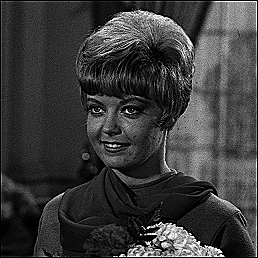

In [12]:
# @title Memanggil function konvolusi untuk kernel sharpen

img_sharpen = convolution2d(img_gray, kernel_sharpen, 1, 2)
cv2_imshow(img_sharpen)